# Fraud Detection

## Problem statement and objective of the project:

The objective of the project is to develop a model that can accurately detect fraudulent credit card transactions. The problem is significant because false positive fraud detections can result in inconvenience for customers, while false negatives can result in monetary losses for the credit card company.

# Data Preparation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../Fraud Detection/Data/creditcard.csv")

In [3]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (284807, 31)


In [4]:
# Overview of the data
print("Overview of the data:" )
df.head()

Overview of the data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print("Data Types of columns:", df.dtypes)



Data Types of columns: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [6]:
print("Description of the dataset:" )
df.describe()


Description of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Distribution of the target variable

### Plotting the distribution of the target variable using seaborn


In [7]:
# Calculating the class counts and percentage
class_counts = df['Class'].value_counts()
class_counts_percentage = df['Class'].value_counts(normalize=True) * 100

# Printing the class counts and percentage
print("Class counts: \n", class_counts)
print("\nClass counts percentage: \n", class_counts_percentage)


Class counts: 
 0    284315
1       492
Name: Class, dtype: int64

Class counts percentage: 
 0    99.827251
1     0.172749
Name: Class, dtype: float64


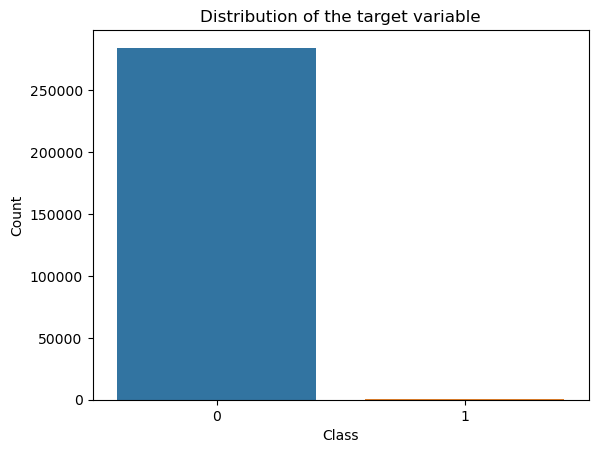

In [8]:
import seaborn as sns

#Plotting the count of each class in the target variable
sns.countplot(x='Class', data=df)

#Adding the title, x-axis label and y-axis label to the plot
plt.title("Distribution of the target variable")
plt.xlabel("Class")
plt.ylabel("Count")

#Displaying the plot
plt.show()

The target variable distribution in the dataset is highly imbalanced with majority of the samples belonging to class 0 (not fraudulent) and only a small proportion of samples belonging to class 1 (fraudulent). This is evident from the count of each target class where there are 284315 samples belonging to class 0 and only 492 samples belonging to class 1. This imbalance in the target variable can potentially impact the performance of the machine learning models and thus, needs to be considered while building and evaluating the models.

This code creates a subplot with two plots side by side. The first plot shows the distribution of the amount for class 0 (not fraud) in blue color. The second plot shows the distribution of the amount for class 1 (fraud) in red color. This visual representation helps us understand the distribution of the amount for both classes and helps us identify if there are any significant differences between the two classes. By comparing the two plots, we can potentially identify certain patterns or characteristics that may be indicative of fraudulent transactions.

# Data exploration and visualization

C:\Users\risha\AppData\Local\Temp\ipykernel_6564\1264309609.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 0]['Amount'], kde=True, ax=axs[0], color='b')
C:\Users\risha\AppData\Local\Temp\ipykernel_6564\1264309609.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['

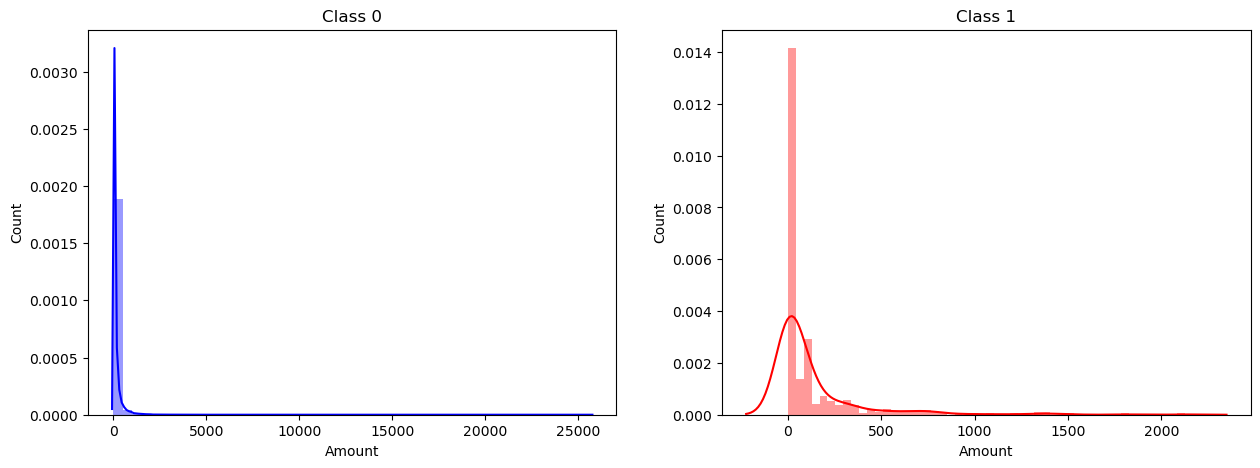

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of amount for class 0
sns.distplot(df[df['Class'] == 0]['Amount'], kde=True, ax=axs[0], color='b')
axs[0].set_title('Class 0')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Count')

# Plot distribution of amount for class 1
sns.distplot(df[df['Class'] == 1]['Amount'], kde=True, ax=axs[1], color='r')
axs[1].set_title('Class 1')
axs[1].set_xlabel('Amount')
axs[1].set_ylabel('Count')

plt.show()


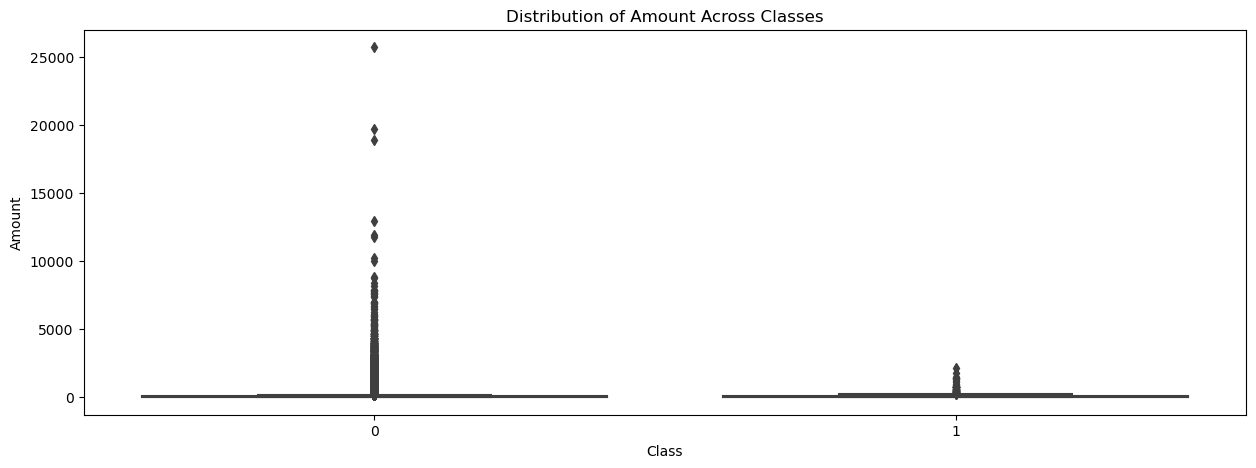

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots to show the distribution of variables across classes
plt.figure(figsize=(15, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Amount Across Classes')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()



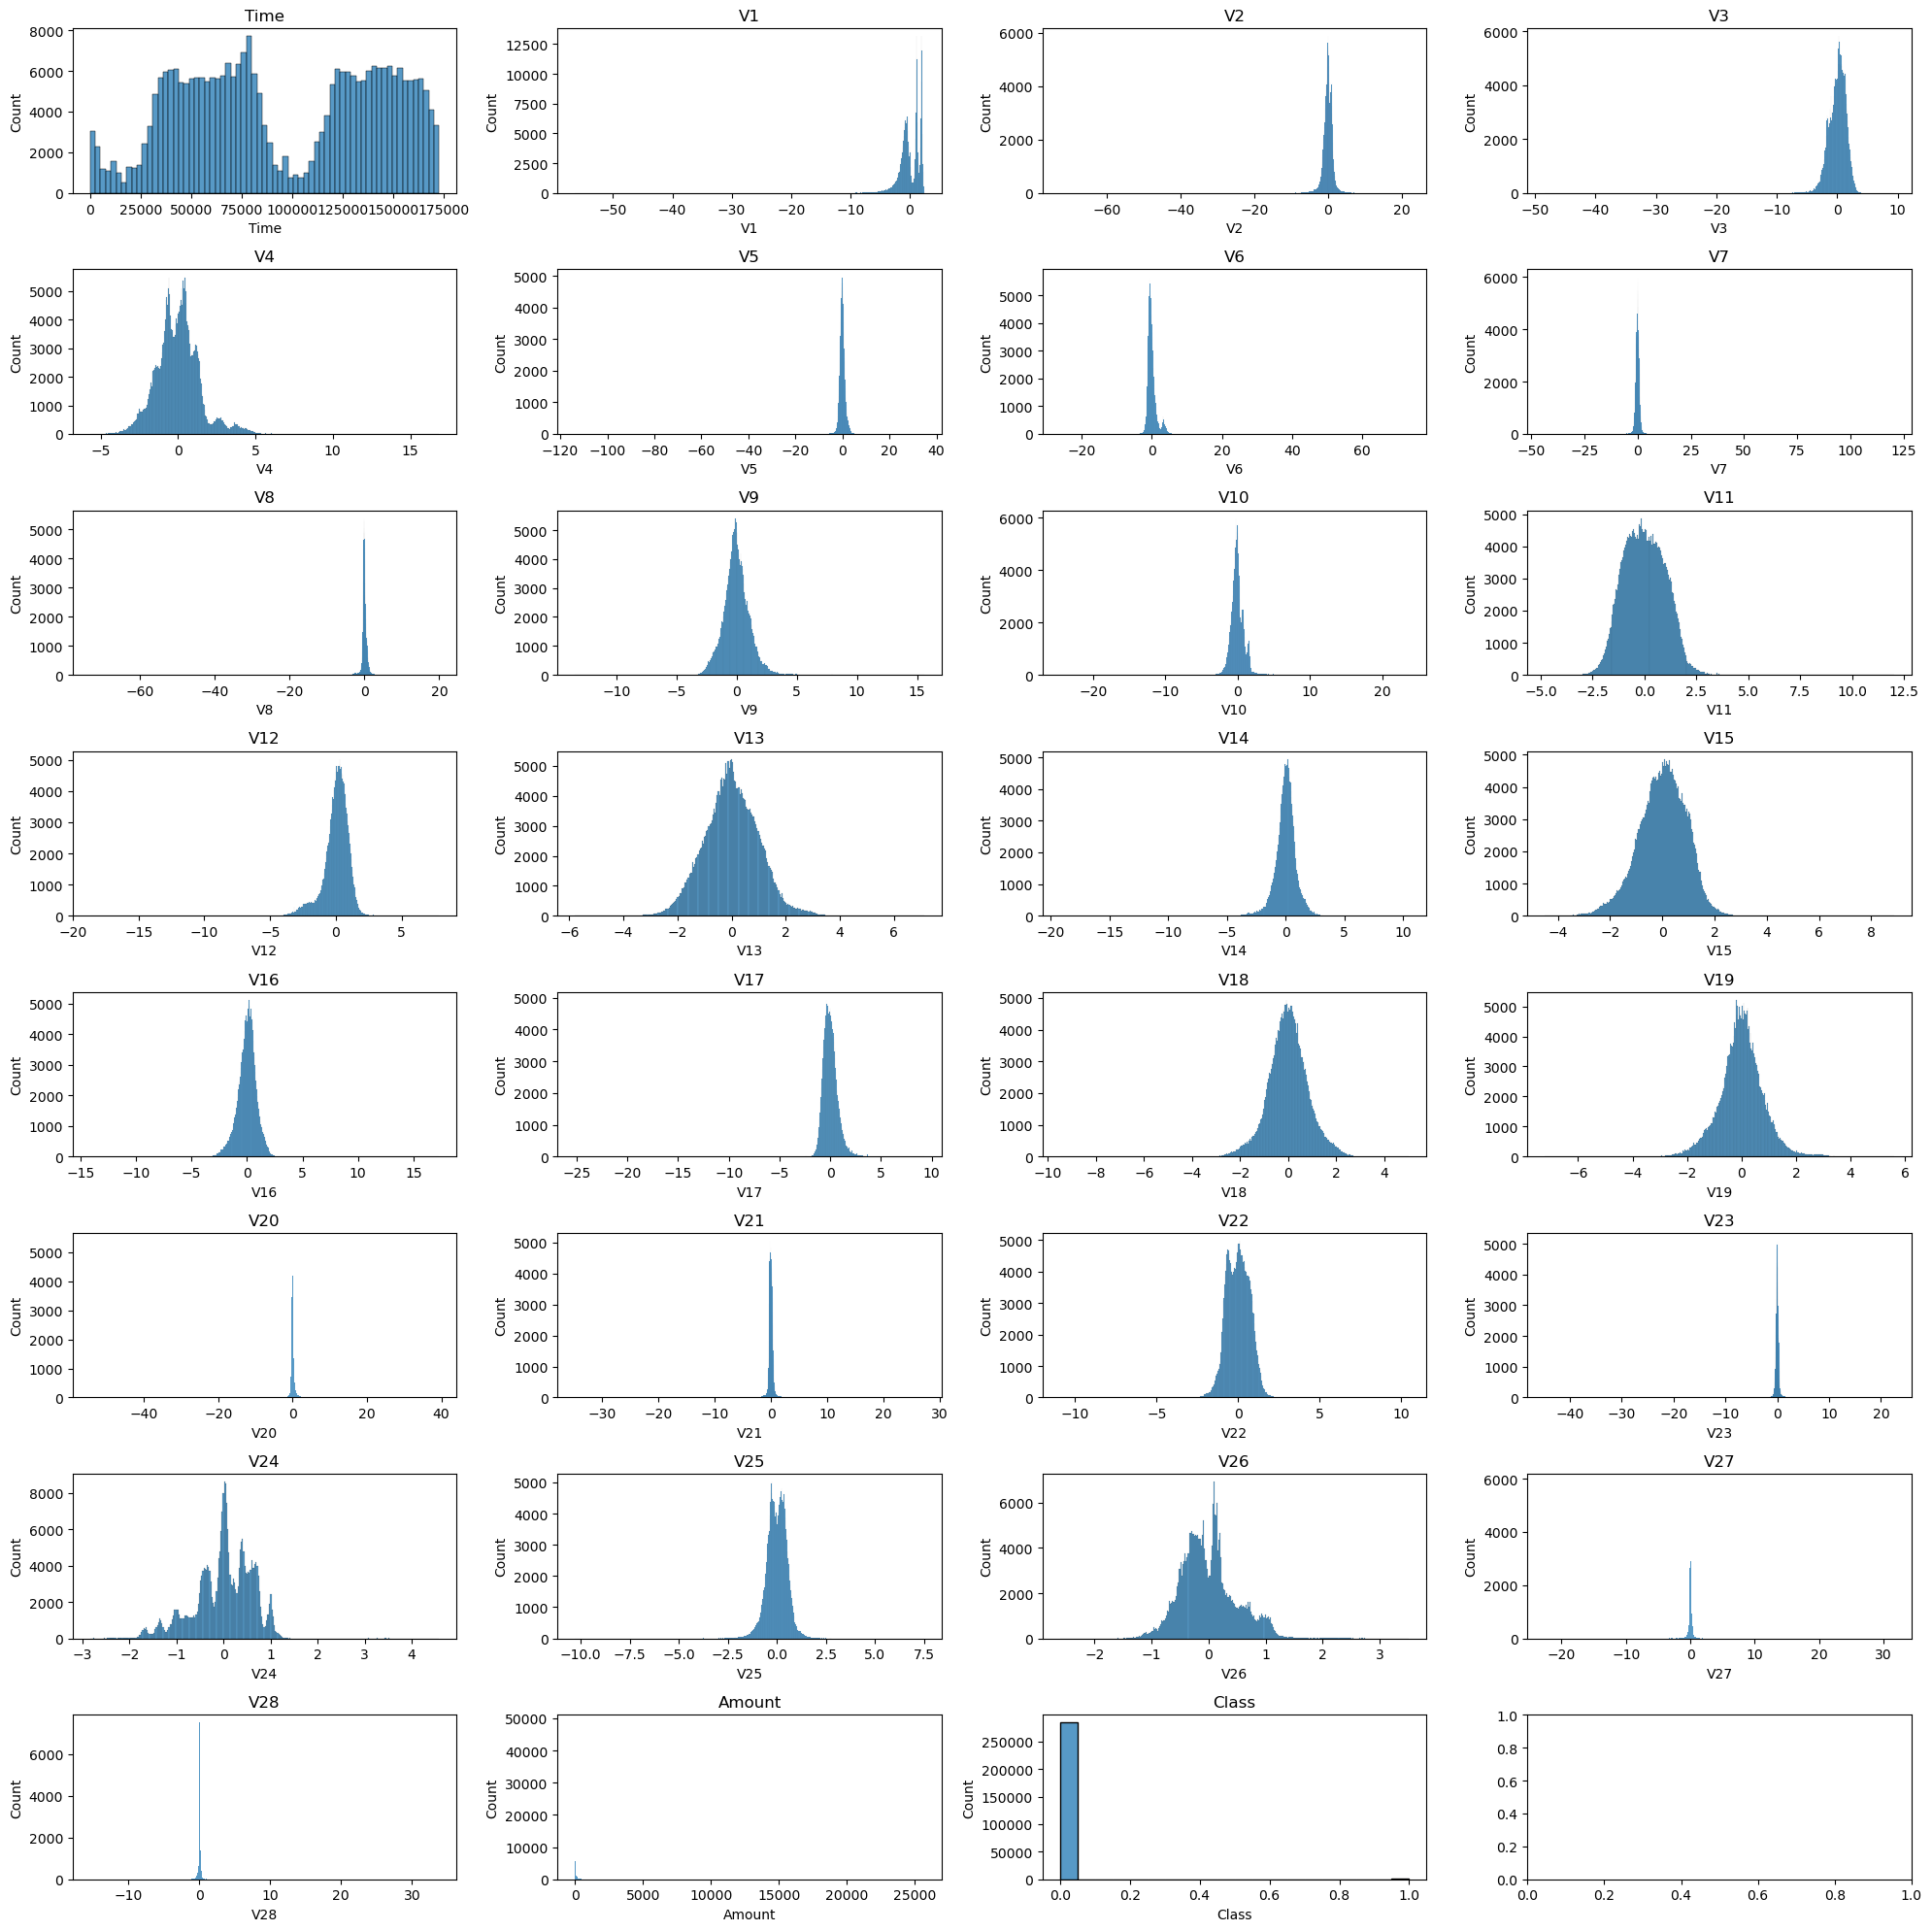

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with multiple plots
fig, axs = plt.subplots(8, 4, figsize=(20, 20))
axs = axs.ravel()

# Plot histograms for all columns
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()


# Missing Data and outliers

In [11]:
missing_values = df.isna().sum()
print(missing_values)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [12]:
import numpy as np

# Calculate the IQR (Interquartile Range) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on IQR
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:

# Check if there are still any NaN or infinite values
print(np.sum(np.isnan(df)))
print(np.sum(np.isfinite(df)))


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Time      146319
V1        146319
V2        146319
V3        146319
V4        146319
V5        146319
V6        146319
V7        146319
V8        146319
V9        146319
V10       146319
V11       146319
V12       146319
V13       146319
V14       146319
V15       146319
V16       146319
V17       146319
V18       146319
V19       146319
V20       146319
V21       146319
V22       146319
V23       146319
V24       146319
V25       146319
V26       146319
V27       146319
V28       146319
Amount    146319
Class     146319
dtype: int64


# Models and evaluation

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Split the data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

## xgboost classifier and SMOTE

In [16]:
import xgboost as xgb
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



# Create the pipeline with StandardScaler and SMOTE for oversampling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('classifier', xgb.XGBClassifier(random_state=42))
])

# Use cross_val_predict to obtain the predicted probabilities
y_scores = cross_val_predict(pipeline, X, y, cv=5, method='predict_proba')[:, 1]

# Calculate the confusion matrix
y_pred = (y_scores > 0.5).astype(int)

ModuleNotFoundError: No module named 'xgboost'

## Evaluation of XGboost classifier and SMOTE 

In [ ]:
# Calculate precision, recall, and f1-score
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)


# Print the metrics

print('Precision: {:.3f}'.format(precision.mean()))
print('Recall: {:.3f}'.format(recall.mean()))
print('F1-Score: {:.3f}'.format(f1.mean()))

In [ ]:
# Plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, y_scores)
auc_pr = auc(recall, precision)
plt.plot(recall, precision, label='AUC-PR: {:.3f}'.format(auc_pr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


## XGboost Weight Tuning

### computing  Class Weight

In [ ]:
from sklearn.utils import compute_class_weight
import numpy as np
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)


In [ ]:
weights

### GridSearchCV XGBoost Weight Tuning

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score

# Define the parameter grid
param_grid = {
    'scale_pos_weight': [0.5 ,  0.6 ,  0.7 ,  0.8 ,  0.9 , 1  ],

}

# Create a custom scoring function based on PRC AUC
prc_auc_scorer = make_scorer(average_precision_score, needs_proba=True)

# Create the XGBoost classifier
clf = xgb.XGBClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, scoring=prc_auc_scorer, cv=5)

# Fit the grid search on the training data


grid_result = grid_search.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Retrain And Re-evaluate XGBoost with weights

In [ ]:
# Create the pipeline with StandardScaler 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    
    ('classifier', xgb.XGBClassifier(scale_pos_weight = 0.8))
])

# Use cross_val_predict to obtain the predicted probabilities
y_scores = cross_val_predict(pipeline, X, y, cv=5, method='predict_proba')[:, 1]

# Calculate the confusion matrix
y_pred = (y_scores > 0.5).astype(int)



In [ ]:
# Calculate precision, recall, and f1-score
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)


# Print the metrics

print('Precision: {:.3f}'.format(precision.mean()))
print('Recall: {:.3f}'.format(recall.mean()))
print('F1-Score: {:.3f}'.format(f1.mean()))


In [ ]:
# Plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, y_scores)
auc_pr = auc(recall, precision)
plt.plot(recall, precision, label='AUC-PR: {:.3f}'.format(auc_pr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


## LightGBM classifier and SMOTE

In [ ]:
import lightgbm as lgb
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



# Create the pipeline with StandardScaler and SMOTE for oversampling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('classifier', lgb.LGBMClassifier(random_state=42))
])

# Use cross_val_predict to obtain the predicted probabilities
y_scores = cross_val_predict(pipeline, X, y, cv=5, method='predict_proba')[:, 1]

# Calculate the confusion matrix
y_pred = (y_scores > 0.5).astype(int)
confusion_matrix = confusion_matrix(y, y_pred)





# Evaluation of LightGBM classifier and SMOTE 

In [ ]:
# Calculate precision, recall, and f1-score
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)


# Print the metrics

print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1-Score: {:.3f}'.format(f1))

In [ ]:

# Plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, y_scores)
auc_pr = auc(recall, precision)
plt.plot(recall, precision, label='AUC-PR: {:.3f}'.format(auc_pr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# GridSearchCV LightGBM Weight Tuning

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score
# Define the parameter grid
param_grid = {
    'scale_pos_weight': [0.5 ,  0.6 ,  0.7 ,  0.8 ,  0.9 , 1  ],

}

# Create a custom scoring function based on PRC AUC
prc_auc_scorer = make_scorer(average_precision_score, needs_proba=True)

# Create the XGBoost classifier
clf = lgb.LGBMClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, scoring=prc_auc_scorer, cv=5)

# Fit the grid search on the training data


grid_result = grid_search.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Retrain And Re-evaluate LightGBM with weights

In [ ]:
import lightgbm as lgb
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



# Create the pipeline with StandardScaler and SMOTE for oversampling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE()),
    ('classifier', lgb.LGBMClassifier(scale_pos_weight= 0.5))
])

# Use cross_val_predict to obtain the predicted probabilities
y_scores = cross_val_predict(pipeline, X, y, cv=5, method='predict_proba')[:, 1]

# Calculate the confusion matrix
y_pred = (y_scores > 0.5).astype(int)
confusion_matrix = confusion_matrix(y, y_pred)


In [ ]:
# Calculate precision, recall, and f1-score
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)


# Print the metrics

print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1-Score: {:.3f}'.format(f1))

In [ ]:

# Plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, y_scores)
auc_pr = auc(recall, precision)
plt.plot(recall, precision, label='AUC-PR: {:.3f}'.format(auc_pr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()